# 1. Vanila Dataset Preprocessing
- 중복데이터 제거
- 아웃라이어 제거

## 1-1. 중복데이터 제거

In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from transformers import AutoTokenizer
import pickle

In [270]:
train_dir= '../dataset/train/train.csv'
test_dir= '../dataset/test/test_data.csv'
train_dataset = pd.read_csv(train_dir)
test_dataset = pd.read_csv(test_dir)

In [271]:
train_dataset

,id,sentence,subject_entity,object_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia
...,...,...,...,...,...,...
32465,32465,한국당은 7일 오전 9시부터 오후 5시까지 진행된 원내대표 및 정책위의장 후보자 등...,"{'word': '유기준', 'start_idx': 93, 'end_idx': 95...","{'word': '부산 서구·동구', 'start_idx': 100, 'end_id...",per:employee_of,wikitree
32466,32466,"법포는 다시 최시형, 서병학, 손병희 직계인 북접과 다시 서장옥, 전봉준, 김개남을...","{'word': '최시형', 'start_idx': 7, 'end_idx': 9, ...","{'word': '손병희', 'start_idx': 17, 'end_idx': 19...",per:colleagues,wikipedia
32467,32467,완도군(군수 신우철)이 국토교통부에서 실시한 '2019 교통문화지수 실태조사'에서 ...,"{'word': '완도군', 'start_idx': 0, 'end_idx': 2, ...","{'word': '신우철', 'start_idx': 7, 'end_idx': 9, ...",org:top_members/employees,wikitree
32468,32468,"중앙일보, JTBC 회장을 지낸 이후 중앙홀딩스 회장, 재단법인 한반도평화만들기 이...","{'word': 'JTBC', 'start_idx': 6, 'end_idx': 9,...","{'word': '중앙홀딩스', 'start_idx': 21, 'end_idx': ...",no_relation,wikipedia


In [272]:
# 문장, sub, obj, label 모두 같으면 첫번째꺼 빼고 다 삭제시켜버리기~
train_dataset_modified = train_dataset.drop_duplicates(['sentence','subject_entity','object_entity', 'label'], keep='first', inplace=False, ignore_index = True)

In [273]:
train_dataset_modified[train_dataset_modified[['sentence','subject_entity','object_entity']].duplicated(keep=False)].sort_values('sentence')
# 6748, 8362, 22242, 277, 4211 삭제 필요

,id,sentence,subject_entity,object_entity,label,source
6748,6749,대한항공은 5일 조양호 회장의 3자녀가 보유한 싸이버스카이 주식 9만9900주 전량...,"{'word': '대한항공', 'start_idx': 0, 'end_idx': 3,...","{'word': '조양호', 'start_idx': 9, 'end_idx': 11,...",no_relation,wikipedia
12823,12829,대한항공은 5일 조양호 회장의 3자녀가 보유한 싸이버스카이 주식 9만9900주 전량...,"{'word': '대한항공', 'start_idx': 0, 'end_idx': 3,...","{'word': '조양호', 'start_idx': 9, 'end_idx': 11,...",org:top_members/employees,wikipedia
8362,8364,배우 김병철 씨가 연기하는 정복동은 천리마마트를 망하게 하기 위해 여러 계획을 세우...,"{'word': '정복동', 'start_idx': 15, 'end_idx': 17...","{'word': '김병철', 'start_idx': 3, 'end_idx': 5, ...",no_relation,wikitree
32257,32299,배우 김병철 씨가 연기하는 정복동은 천리마마트를 망하게 하기 위해 여러 계획을 세우...,"{'word': '정복동', 'start_idx': 15, 'end_idx': 17...","{'word': '김병철', 'start_idx': 3, 'end_idx': 5, ...",per:alternate_names,wikitree
11505,11511,"영화 '버즈 오브 프레이'는 배트맨이 없는 고담시에서 할리퀸, 헌트리스, 블랙 카나...","{'word': '배트맨', 'start_idx': 16, 'end_idx': 18...","{'word': '고담시', 'start_idx': 24, 'end_idx': 26...",per:place_of_residence,wikitree
22242,22258,"영화 '버즈 오브 프레이'는 배트맨이 없는 고담시에서 할리퀸, 헌트리스, 블랙 카나...","{'word': '배트맨', 'start_idx': 16, 'end_idx': 18...","{'word': '고담시', 'start_idx': 24, 'end_idx': 26...",no_relation,wikitree
277,277,"이날 프로그램 공개에서는 전북영산작법보존회와 김명신‧정상희의 사제동행 판소리, 관악...","{'word': '강태환', 'start_idx': 62, 'end_idx': 64...","{'word': '색소폰', 'start_idx': 58, 'end_idx': 60...",no_relation,wikitree
3296,3296,"이날 프로그램 공개에서는 전북영산작법보존회와 김명신‧정상희의 사제동행 판소리, 관악...","{'word': '강태환', 'start_idx': 62, 'end_idx': 64...","{'word': '색소폰', 'start_idx': 58, 'end_idx': 60...",per:title,wikitree
4211,4212,한편 전라남도는 최근 확진자가 발생한 순천시와 여수시에 마스크를 각각 2만장씩 총 ...,"{'word': '전라남도', 'start_idx': 3, 'end_idx': 6,...","{'word': '여수시', 'start_idx': 26, 'end_idx': 28...",org:members,wikitree
25074,25094,한편 전라남도는 최근 확진자가 발생한 순천시와 여수시에 마스크를 각각 2만장씩 총 ...,"{'word': '전라남도', 'start_idx': 3, 'end_idx': 6,...","{'word': '여수시', 'start_idx': 26, 'end_idx': 28...",org:place_of_headquarters,wikitree


In [274]:
train_dataset_modified = train_dataset_modified.drop([6748, 8362, 22242, 277, 4211])
train_dataset_modified[train_dataset_modified[['sentence','subject_entity','object_entity']].duplicated(keep=False)].sort_values('sentence')
# 6748, 8362, 22242, 277, 4211 삭제 필요
# 제거 완료 확인 사살

,id,sentence,subject_entity,object_entity,label,source


In [275]:
train_dataset_modified['id'] = [i for i in range(len(train_dataset_modified))]
train_dataset_modified = train_dataset_modified[['id','sentence', 'subject_entity', 'object_entity', 'subject_entity','label','source']]
train_dataset_modified.reset_index(drop=False, inplace=True)
train_dataset_modified.drop(['index'], axis=1, inplace=True)

In [276]:
train_dataset_modified

,id,sentence,subject_entity,object_entity,subject_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...","{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...","{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...","{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...",org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...","{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...",org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...","{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...",no_relation,wikipedia
...,...,...,...,...,...,...,...
32418,32418,한국당은 7일 오전 9시부터 오후 5시까지 진행된 원내대표 및 정책위의장 후보자 등...,"{'word': '유기준', 'start_idx': 93, 'end_idx': 95...","{'word': '부산 서구·동구', 'start_idx': 100, 'end_id...","{'word': '유기준', 'start_idx': 93, 'end_idx': 95...",per:employee_of,wikitree
32419,32419,"법포는 다시 최시형, 서병학, 손병희 직계인 북접과 다시 서장옥, 전봉준, 김개남을...","{'word': '최시형', 'start_idx': 7, 'end_idx': 9, ...","{'word': '손병희', 'start_idx': 17, 'end_idx': 19...","{'word': '최시형', 'start_idx': 7, 'end_idx': 9, ...",per:colleagues,wikipedia
32420,32420,완도군(군수 신우철)이 국토교통부에서 실시한 '2019 교통문화지수 실태조사'에서 ...,"{'word': '완도군', 'start_idx': 0, 'end_idx': 2, ...","{'word': '신우철', 'start_idx': 7, 'end_idx': 9, ...","{'word': '완도군', 'start_idx': 0, 'end_idx': 2, ...",org:top_members/employees,wikitree
32421,32421,"중앙일보, JTBC 회장을 지낸 이후 중앙홀딩스 회장, 재단법인 한반도평화만들기 이...","{'word': 'JTBC', 'start_idx': 6, 'end_idx': 9,...","{'word': '중앙홀딩스', 'start_idx': 21, 'end_idx': ...","{'word': 'JTBC', 'start_idx': 6, 'end_idx': 9,...",no_relation,wikipedia


## 1-2 아웃라이어 제거

In [277]:
train_dataset_modified.describe(include='all')
# 특히 긴 문장 또는 특히 긴 sub, obj 삭제하기

,id,sentence,subject_entity,object_entity,subject_entity,label,source
count,32423.000000,32423,32423,32423,32423,32423,32423
unique,NaN,28803,26340,25704,26340,30,3
top,NaN,"김 예비후보는 “김대중 대통령과 김근태 의장, 박원순 서울시장과 함께 일했고, 문재...","{'word': '화순군', 'start_idx': 0, 'end_idx': 2, ...","{'word': '구충곤', 'start_idx': 7, 'end_idx': 9, ...","{'word': '화순군', 'start_idx': 0, 'end_idx': 2, ...",no_relation,wikipedia
freq,NaN,3,98,94,98,9513,21602
mean,16211.000000,NaN,NaN,NaN,NaN,NaN,NaN
std,9359.858225,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,8105.500000,NaN,NaN,NaN,NaN,NaN,NaN
50%,16211.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,24316.500000,NaN,NaN,NaN,NaN,NaN,NaN


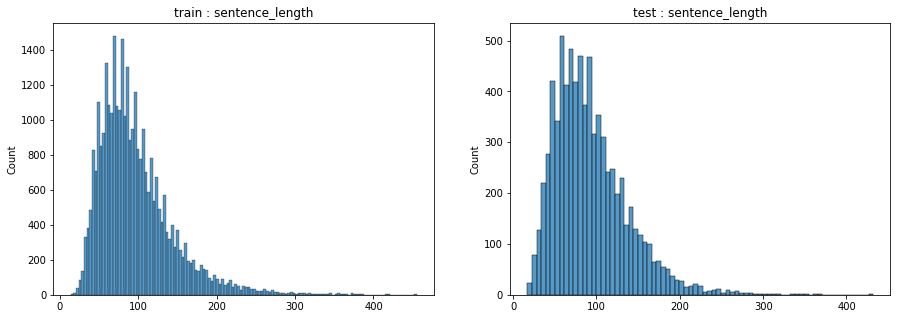

In [278]:
import seaborn as sns
train_sentence_length = [len(e) for e in train_dataset_modified['sentence']]
test_sentence_length = [len(e) for e in test_dataset['sentence']]
fix, ax = plt.subplots(ncols=2, figsize=(15,5))
sns.histplot(train_sentence_length, ax=ax[0]).set_title("train : sentence_length")
sns.histplot(test_sentence_length, ax=ax[1]).set_title("test : sentence_length");

In [279]:
cnt = 0
# 240 이상 : 1.66%
# 250 이상 : 1.31%
# 260 이상 : 1.1%
# 270 이상 : 0.88%
# 280 이상 : 0.70%
# 290 이상 : 0.61%
# 300 이상 : 0.50%
for i in train_sentence_length :
    if i >= 250 :
        cnt += 1

print(cnt / len(train_sentence_length)*100,'%')

1.3169663510470961 %


In [280]:
cnt = 0
# 240 이상 : 0.94%
# 250 이상 : 0.69%
# 260 이상 : 0.55%
# 270 이상 : 0.38%
# 280 이상 : 0.29%
# 290 이상 : 0.23%
# 300 이상 : 0.18%
for i in test_sentence_length :
    if i >= 250 :
        cnt += 1

print(cnt / len(test_sentence_length)*100,'%')

0.6954282034771411 %


In [281]:
# 따라서 길이 250 이상이면 삭제하는 방법을 사용하자!(train : test 비율이 두배 가까이 나므로)

for i in tqdm(range(len(train_dataset_modified))) :
    if len(train_dataset_modified['sentence'][i]) >= 250 :
        train_dataset_modified = train_dataset_modified.drop(i)

100%|██████████| 32423/32423 [00:25<00:00, 1290.82it/s]


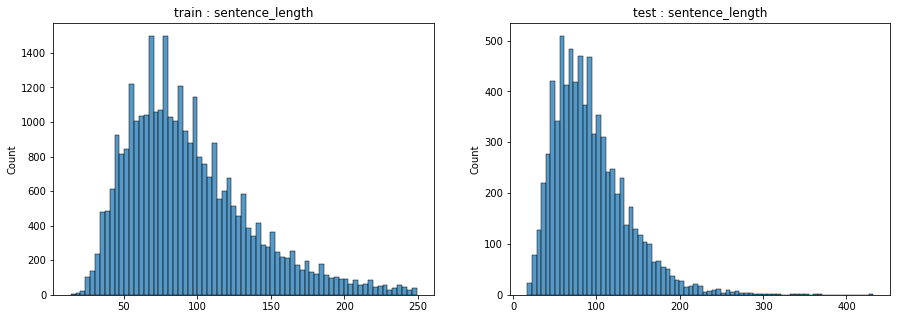

In [282]:
# 확인사살
train_sentence_length = [len(e) for e in train_dataset_modified['sentence']]
test_sentence_length = [len(e) for e in test_dataset['sentence']]
fix, ax = plt.subplots(ncols=2, figsize=(15,5))
sns.histplot(train_sentence_length, ax=ax[0]).set_title("train : sentence_length")
sns.histplot(test_sentence_length, ax=ax[1]).set_title("test : sentence_length");

In [285]:
train_dataset_modified['id'] = [i for i in range(len(train_dataset_modified))]
train_dataset_modified = train_dataset_modified[['id','sentence', 'subject_entity', 'object_entity', 'subject_entity','label','source']]
train_dataset_modified.reset_index(drop=False, inplace=True)
train_dataset_modified.drop(['index'], axis=1, inplace=True)


In [286]:
train_dataset_modified

,id,sentence,subject_entity,subject_entity,object_entity,subject_entity,subject_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...","{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...","{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...","{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...",org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...","{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...",org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...","{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...",no_relation,wikipedia
...,...,...,...,...,...,...,...,...,...
31991,31991,한국당은 7일 오전 9시부터 오후 5시까지 진행된 원내대표 및 정책위의장 후보자 등...,"{'word': '유기준', 'start_idx': 93, 'end_idx': 95...","{'word': '유기준', 'start_idx': 93, 'end_idx': 95...","{'word': '부산 서구·동구', 'start_idx': 100, 'end_id...","{'word': '유기준', 'start_idx': 93, 'end_idx': 95...","{'word': '유기준', 'start_idx': 93, 'end_idx': 95...",per:employee_of,wikitree
31992,31992,"법포는 다시 최시형, 서병학, 손병희 직계인 북접과 다시 서장옥, 전봉준, 김개남을...","{'word': '최시형', 'start_idx': 7, 'end_idx': 9, ...","{'word': '최시형', 'start_idx': 7, 'end_idx': 9, ...","{'word': '손병희', 'start_idx': 17, 'end_idx': 19...","{'word': '최시형', 'start_idx': 7, 'end_idx': 9, ...","{'word': '최시형', 'start_idx': 7, 'end_idx': 9, ...",per:colleagues,wikipedia
31993,31993,완도군(군수 신우철)이 국토교통부에서 실시한 '2019 교통문화지수 실태조사'에서 ...,"{'word': '완도군', 'start_idx': 0, 'end_idx': 2, ...","{'word': '완도군', 'start_idx': 0, 'end_idx': 2, ...","{'word': '신우철', 'start_idx': 7, 'end_idx': 9, ...","{'word': '완도군', 'start_idx': 0, 'end_idx': 2, ...","{'word': '완도군', 'start_idx': 0, 'end_idx': 2, ...",org:top_members/employees,wikitree
31994,31994,"중앙일보, JTBC 회장을 지낸 이후 중앙홀딩스 회장, 재단법인 한반도평화만들기 이...","{'word': 'JTBC', 'start_idx': 6, 'end_idx': 9,...","{'word': 'JTBC', 'start_idx': 6, 'end_idx': 9,...","{'word': '중앙홀딩스', 'start_idx': 21, 'end_idx': ...","{'word': 'JTBC', 'start_idx': 6, 'end_idx': 9,...","{'word': 'JTBC', 'start_idx': 6, 'end_idx': 9,...",no_relation,wikipedia


In [287]:
train_dataset_modified.to_csv("train_dataset_modified.csv", encoding='utf-8')

# 2. Dataset Augmentation

중복 데이터를 다 처리했다면 그 다음엔 data 수를 증가시키기 위한 여러가지 방법을 써보자!

- SR: Synonym Replacement, 특정 단어를 유의어로 교체
- RI: Random Insertion, 임의의 단어를 삽입
- RS: Random Swap, 문장 내 임의의 두 단어의 위치를 바꿈
- RD: Random Deletion: 임의의 단어를 삭제
- https://catsirup.github.io/ai/2020/04/21/nlp_data_argumentation.html

## 2-0. 문제 인식

In [288]:
import pandas as pd
dataset = pd.read_csv('train_dataset_modified.csv', index_col=0, encoding='utf-8')
dataset

,id,sentence,subject_entity,subject_entity.1,object_entity,subject_entity.2,subject_entity.3,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...","{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...","{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...","{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...",org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...","{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...",org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...","{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...",no_relation,wikipedia
...,...,...,...,...,...,...,...,...,...
31991,31991,한국당은 7일 오전 9시부터 오후 5시까지 진행된 원내대표 및 정책위의장 후보자 등...,"{'word': '유기준', 'start_idx': 93, 'end_idx': 95...","{'word': '유기준', 'start_idx': 93, 'end_idx': 95...","{'word': '부산 서구·동구', 'start_idx': 100, 'end_id...","{'word': '유기준', 'start_idx': 93, 'end_idx': 95...","{'word': '유기준', 'start_idx': 93, 'end_idx': 95...",per:employee_of,wikitree
31992,31992,"법포는 다시 최시형, 서병학, 손병희 직계인 북접과 다시 서장옥, 전봉준, 김개남을...","{'word': '최시형', 'start_idx': 7, 'end_idx': 9, ...","{'word': '최시형', 'start_idx': 7, 'end_idx': 9, ...","{'word': '손병희', 'start_idx': 17, 'end_idx': 19...","{'word': '최시형', 'start_idx': 7, 'end_idx': 9, ...","{'word': '최시형', 'start_idx': 7, 'end_idx': 9, ...",per:colleagues,wikipedia
31993,31993,완도군(군수 신우철)이 국토교통부에서 실시한 '2019 교통문화지수 실태조사'에서 ...,"{'word': '완도군', 'start_idx': 0, 'end_idx': 2, ...","{'word': '완도군', 'start_idx': 0, 'end_idx': 2, ...","{'word': '신우철', 'start_idx': 7, 'end_idx': 9, ...","{'word': '완도군', 'start_idx': 0, 'end_idx': 2, ...","{'word': '완도군', 'start_idx': 0, 'end_idx': 2, ...",org:top_members/employees,wikitree
31994,31994,"중앙일보, JTBC 회장을 지낸 이후 중앙홀딩스 회장, 재단법인 한반도평화만들기 이...","{'word': 'JTBC', 'start_idx': 6, 'end_idx': 9,...","{'word': 'JTBC', 'start_idx': 6, 'end_idx': 9,...","{'word': '중앙홀딩스', 'start_idx': 21, 'end_idx': ...","{'word': 'JTBC', 'start_idx': 6, 'end_idx': 9,...","{'word': 'JTBC', 'start_idx': 6, 'end_idx': 9,...",no_relation,wikipedia


In [289]:
# 일단 class imbalance가 매우 심하다...
dataset['label'].value_counts()

no_relation                            9332
org:top_members/employees              4243
per:employee_of                        3527
per:title                              2075
org:member_of                          1833
org:alternate_names                    1292
per:origin                             1224
org:place_of_headquarters              1182
per:date_of_birth                      1126
per:alternate_names                     985
per:spouse                              793
per:colleagues                          525
per:parents                             511
org:founded                             448
per:date_of_death                       413
org:members                             412
org:product                             377
per:children                            299
per:place_of_residence                  192
per:other_family                        189
per:place_of_birth                      166
org:founded_by                          154
per:product                     

## 2-1. SR: Synonym Replacement, 특정 단어를 유의어로 교체

## 2-2. RI: Random Insertion, 임의의 단어를 삽입

## 2-3. RS: Random Swap, 문장 내 임의의 두 단어의 위치를 바꿈

## 2-4. RD: Random Deletion: 임의의 단어를 삭제